<a id='top'></a>
# Tavakaiv
An Exploration of the Pikes Peak Ascent and Marathon  
CSCI 4022 Advanced Data Science  
Fall 2019  
Mark Ivlev and Spencer Wegner

Links:  
[Data Cleaning](#data-cleaning) | 
[Clustering](#clustering)

<a id='data-cleaning'></a>
[Back to Top](#top)
### Data Cleaning

#### Notes:
- drop DNF's
- drop AG 1-15
- K-means: AG score and overall score

In [49]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
#df = pd.read_csv("/Users/spencerwegner/Documents/School/4th Year/fall-2019/csci-4022-data-science/project/tavakaiv/pikes_peak_results.csv")
df = pd.read_csv("/Users/Mark Ivlev/Documents/GitHub/tavakaiv/pikes_peak_results.csv")
# drop name information
df=df.drop(columns='First')
df=df.drop(columns='Mi')
df=df.drop(columns='Last')

In [6]:
# update column types (convert times to strings for next step)
df = df.astype({'Pos': 'float', 'Div': 'str', 'Mpos': 'float', 'Mdiv': 'str', 'Sex': 'str', 'Age': 'float', \
                'Grp': 'str', 'City': 'str', 'State': 'str', 'NNup': 'str', 'BCupSplit': 'str', 'BCup': 'str', \
                'AFupSplit': 'str', 'AFup': 'str', 'AscSplit': 'str', 'Asc': 'str', 'AFdwnSplit': 'str', \
                'AFdwn': 'str', 'BCdwnSplit': 'str', 'BCdwn': 'str', 'NNdwnSplit': 'str', 'NNdwn': 'str', \
                'DwnSplit': 'str', 'Dwn': 'str', 'Mar': 'str', 'Race': 'str'})

In [7]:
# convert times (strings) to datetime type
df['NNup'] = pd.to_datetime(df['NNup'], format='%H:%M:%S')
df['BCupSplit'] = pd.to_datetime(df['BCupSplit'], format='%H:%M:%S')
df['BCup'] = pd.to_datetime(df['BCup'], format='%H:%M:%S')
df['AFupSplit'] = pd.to_datetime(df['AFupSplit'], format='%H:%M:%S')
df['AFup'] = pd.to_datetime(df['AFup'], format='%H:%M:%S')
df['AscSplit'] = pd.to_datetime(df['AscSplit'], format='%H:%M:%S')
df['Asc'] = pd.to_datetime(df['Asc'], format='%H:%M:%S')
df['AFdwnSplit'] = pd.to_datetime(df['AFdwnSplit'], format='%H:%M:%S')
df['AFdwn'] = pd.to_datetime(df['AFdwn'], format='%H:%M:%S')
df['BCdwnSplit'] = pd.to_datetime(df['BCdwnSplit'], format='%H:%M:%S')
df['BCdwn'] = pd.to_datetime(df['BCdwn'], format='%H:%M:%S')
df['NNdwnSplit'] = pd.to_datetime(df['NNdwnSplit'], format='%H:%M:%S')
df['NNdwn'] = pd.to_datetime(df['NNdwn'], format='%H:%M:%S')
df['DwnSplit'] = pd.to_datetime(df['DwnSplit'], format='%H:%M:%S')
df['Dwn'] = pd.to_datetime(df['Dwn'], format='%H:%M:%S')
df['Mar'] = pd.to_datetime(df['Mar'], format='%H:%M:%S')

In [8]:
# convert time to seconds
def time_seconds(hours, minutes, seconds):
    return 3600*hours + 60*minutes + seconds

# use lambda and apply to update time columns with seconds (takes a minute or so to run)
df['NNup'] = df.apply(lambda x: time_seconds(x['NNup'].hour, x['NNup'].minute, x['NNup'].second), axis=1)
df['BCupSplit'] = df.apply(lambda x: time_seconds(x['BCupSplit'].hour, x['BCupSplit'].minute, x['BCupSplit'].second), axis=1)
df['BCup'] = df.apply(lambda x: time_seconds(x['BCup'].hour, x['BCup'].minute, x['BCup'].second), axis=1)
df['AFupSplit'] = df.apply(lambda x: time_seconds(x['AFupSplit'].hour, x['AFupSplit'].minute, x['AFupSplit'].second), axis=1)
df['AFup'] = df.apply(lambda x: time_seconds(x['AFup'].hour, x['AFup'].minute, x['AFup'].second), axis=1)
df['AscSplit'] = df.apply(lambda x: time_seconds(x['AscSplit'].hour, x['AscSplit'].minute, x['AscSplit'].second), axis=1)
df['Asc'] = df.apply(lambda x: time_seconds(x['Asc'].hour, x['Asc'].minute, x['Asc'].second), axis=1)
df['AFdwnSplit'] = df.apply(lambda x: time_seconds(x['AFdwnSplit'].hour, x['AFdwnSplit'].minute, x['AFdwnSplit'].second), axis=1)
df['AFdwn'] = df.apply(lambda x: time_seconds(x['AFdwn'].hour, x['AFdwn'].minute, x['AFdwn'].second), axis=1)
df['BCdwnSplit'] = df.apply(lambda x: time_seconds(x['BCdwnSplit'].hour, x['BCdwnSplit'].minute, x['BCdwnSplit'].second), axis=1)
df['BCdwn'] = df.apply(lambda x: time_seconds(x['BCdwn'].hour, x['BCdwn'].minute, x['BCdwn'].second), axis=1)
df['NNdwnSplit'] = df.apply(lambda x: time_seconds(x['NNdwnSplit'].hour, x['NNdwnSplit'].minute, x['NNdwnSplit'].second), axis=1)
df['NNdwn'] = df.apply(lambda x: time_seconds(x['NNdwn'].hour, x['NNdwn'].minute, x['NNdwn'].second), axis=1)
df['DwnSplit'] = df.apply(lambda x: time_seconds(x['DwnSplit'].hour, x['DwnSplit'].minute, x['DwnSplit'].second), axis=1)
df['Dwn'] = df.apply(lambda x: time_seconds(x['Dwn'].hour, x['Dwn'].minute, x['Dwn'].second), axis=1)
df['Mar'] = df.apply(lambda x: time_seconds(x['Mar'].hour, x['Mar'].minute, x['Mar'].second), axis=1)

In [9]:
dftemp = df

In [10]:
dftemp.loc[(dftemp['Race'] == 'A') & (dftemp['Year'] == 1975) & (dftemp['Grp'] == '45-49') & (dftemp['Sex'] == 'F')]

,ID,Pos,Div,Mpos,Mdiv,PPs,Sex,Age,Grp,City,...,AFdwn,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year
1646,56580,5.0,4/18,NaN,nan,4,F,46.0,45-49,OAKLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1975
14150,56582,9.0,6/18,NaN,nan,1,F,47.0,45-49,SANTA FE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1975


In [11]:
df.head() # DF with both ascent and marathon racers

,ID,Pos,Div,Mpos,Mdiv,PPs,Sex,Age,Grp,City,...,AFdwn,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year
0,79698,410.0,67/77,NaN,nan,1,F,34.0,30-34,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2011
1,110626,257.0,40/132,NaN,nan,1,M,34.0,30-34,LAKEWOOD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017
2,75566,891.0,86/102,NaN,nan,1,M,29.0,25-29,SAN ANTONIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009
3,70663,414.0,69/83,NaN,nan,2,F,39.0,35-39,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2007
4,74588,397.0,49/63,NaN,nan,2,F,41.0,40-44,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009


In [12]:
# create dataframe for ascent races
dfA=df[df.Race=='A']
dfA = dfA.drop(columns = ['AFdwnSplit', 'AFdwn', 'BCdwnSplit', 'BCdwn', 'NNdwnSplit', 'NNdwn', 'DwnSplit', \
                         'Dwn', 'Mar', 'Mpos', 'Mdiv'])

In [13]:
def parse_div(Mdiv):
    return Mdiv.split('/')[0]

dfA['Div_place'] = dfA.apply(lambda x: parse_div(x['Div']), axis=1)

In [14]:
dfA.head() # DF with only ascent racers

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,BCupSplit,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place
0,79698,410.0,67/77,1,F,34.0,30-34,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19868.0,A,2011,67
1,110626,257.0,40/132,1,M,34.0,30-34,LAKEWOOD,CO,NaN,NaN,6734.0,3123.0,9857.0,4379.0,14236.0,A,2017,40
2,75566,891.0,86/102,1,M,29.0,25-29,SAN ANTONIO,TX,NaN,NaN,NaN,NaN,NaN,NaN,17868.0,A,2009,86
3,70663,414.0,69/83,2,F,39.0,35-39,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,20781.0,A,2007,69
4,74588,397.0,49/63,2,F,41.0,40-44,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19931.0,A,2009,49


In [15]:
# Div rows to drop based on these values
drop_list_asc = ['DNF', 'DNF-OCO', 'DNF-AF', 'DNF-BC', '', 'DNF-NN',
        'DNF-3', 'DNF-BP', 'DNF-IO', 'DQ-WAVE', '?', 'DNF-<BP', 'DNF-RX',
        'DNF-HR', 'DNF-<BR', 'DNF-<BC', 'DNF-BR', 'DQ-US',
        'DNF-Ws', 'DNF-NN+', 'DNF-<NN', 'DNF-INC', 'DQ-SWAP', 'DQed',
        'DNF-8m', 'DNF-4m', 'DNF-<AF', 'DNF-7m', 'DNF-11m',
       'DQ', 'DNF-UR', 'DNF-ST']

In [16]:
# drop DNF's, DQ's, and NaN's
for index, row in dfA.iterrows():
    if row['Div'] in drop_list_asc:
        dfA.drop(index, inplace=True)

In [17]:
# create dataframe for marathon races
dfM=df[df.Race=='M']
dfM = dfM.drop(columns = ['Pos', 'Div'])

In [18]:
# Mdiv rows to drop based on these values
drop_list_mar = ['DNF-TOP', 'DNF-OCT', 'DNF', 'DNF-OCO', 'DNF-AF',
        'DNF-R', 'DQ-AF', 'DNF-BC', 'DNF-NN', 'DNF->BC','DNF-CQ', 'DNF-12+',
       'DNF->AF', 'DNF-<AF', 'DNF-11m', 'DNF-Top', 'DNF-BC+', 'DQ-Wave', 'nan',
        'DNF-Ws', 'DQ-BC', 'DQ', 'DNF-<NN', 'DNF-BP', 'DNF-RX',
       'DNF-<BC', 'DNF-BR', 'DNF-WET', 'DNF-COG', 'DNF-FX', 'DNF-TMS',
       'DNF-AF+', 'DNF-SMK', 'DNF-IO', 'DNF-NN+', '']

In [19]:
# drop DNF's, DQ's, and NaN's
for index, row in dfM.iterrows():
    if row['Mdiv'] in drop_list_mar:
        dfM.drop(index, inplace=True)

In [20]:
def parse_div(Mdiv):
    return Mdiv.split('/')[0]

dfM['Mdiv_place'] = dfM.apply(lambda x: parse_div(x['Mdiv']), axis=1)

In [21]:
dfM.head() # DF with only marathon racers

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place
12,111562,170.0,15/17,3,F,55.0,55-59,COLORADO SPRING,CO,5555.0,...,NaN,28728.0,NaN,NaN,NaN,13485.0,35225.0,M,2017,15
13,79048,402.0,51/70,1,M,52.0,50-54,CORAL SPRINGS,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,11036.0,29031.0,M,2010,51
19,44930,164.0,54/101,3,M,31.0,30-34,AUSTIN,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,7095.0,19276.0,M,1981,54
20,48926,197.0,56/108,3,M,32.0,30-34,WESTFORD,MA,NaN,...,NaN,NaN,NaN,NaN,NaN,7585.0,20372.0,M,1982,56
24,114099,14.0,3/79,3,M,35.0,35-39,BOULDER,CO,2783.0,...,1230.0,12965.0,1536.0,14501.0,1597.0,5981.0,16098.0,M,2018,3


<a id='clustering'></a>
### Clustering

In [22]:
# Ascent
# add score column to dfM
dfA['score'] = np.nan

# compute score = fastest AG Mar time / Mar time (1 for first in AG)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Grp'] == ag) & (dfA['Sex'] == sex)]
            try:
                best_time = min(dfT['Asc'])
            except ValueError: # nobody in AG
                # print(year, ag, sex)
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Asc']
                dfA.loc[index, 'score'] = score

In [23]:
# Marathon
# add score column to dfM
dfM['score'] = np.nan

# compute score = fastest AG Mar time / Mar time (1 for first in AG)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Grp'] == ag) & (dfM['Sex'] == sex)]
            try:
                best_time = min(dfT['Mar'])
            except ValueError: # nobody in AG
                # print(year, ag, sex)
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Mar']
                dfM.loc[index, 'score'] = score

Below is just trying to figure out what is going on

In [24]:
dfA.loc[(dfA['score'] == 1) & (dfA['Div_place'] != '1')]

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,BCupSplit,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place,score
1646,56580,5.0,4/18,4,F,46.0,45-49,OAKLAND,CA,NaN,NaN,NaN,NaN,NaN,NaN,12460.0,A,1975,4,1.0
2213,47613,277.0,2/6,1,M,62.0,60-64,MONTE VISTA,CO,NaN,NaN,NaN,NaN,NaN,NaN,14936.0,A,1976,2,1.0
2278,57330,68.0,4/10,8,M,58.0,55-59,PUEBLO,CO,NaN,NaN,NaN,NaN,NaN,NaN,12526.0,A,1972,4,1.0
2279,57561,89.0,4/14,8,M,59.0,55-59,PUEBLO,CO,NaN,NaN,NaN,NaN,NaN,NaN,12496.0,A,1973,4,1.0
2567,56595,27.0,16/18,8,F,58.0,55-59,SAN FRANCISCO,CA,NaN,NaN,NaN,NaN,NaN,NaN,22200.0,A,1975,16,1.0
2828,53984,12.0,2/34,3,M,18.0,16-19,GRAND JUNCTION,CO,NaN,NaN,NaN,NaN,NaN,NaN,11403.0,A,1968,2,1.0
3646,29854,10.0,3/7,2,F,39.0,35-39,BOULDER,CO,NaN,NaN,NaN,NaN,NaN,NaN,14207.0,A,1977,3,1.0
4084,46815,15.0,3/20,1,F,27.0,25-29,DENVER,CO,NaN,NaN,NaN,NaN,NaN,NaN,13953.0,A,1978,3,1.0
4620,54107,NaN,3/3,2,M,64.0,60-64,SOUTHGATEE,MI,NaN,NaN,NaN,NaN,NaN,NaN,23100.0,A,1970,3,1.0
7099,47426,8.0,2/8,4,F,31.0,30-34,NORTH OAKS,MN,NaN,NaN,NaN,NaN,NaN,NaN,13765.0,A,1976,2,1.0


In [25]:
dfA.loc[(dfA['Year'] == 1975) & (dfA['Grp'] == '45-49') & (dfA['Sex'] == 'F')]

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,BCupSplit,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place,score
1646,56580,5.0,4/18,4,F,46.0,45-49,OAKLAND,CA,NaN,NaN,NaN,NaN,NaN,NaN,12460.0,A,1975,4,1.000000
14150,56582,9.0,6/18,1,F,47.0,45-49,SANTA FE,NM,NaN,NaN,NaN,NaN,NaN,NaN,13920.0,A,1975,6,0.895115


In [68]:
a1=dfA['score'].fillna(0) #There were still nans in here somehow, this replaces them with 0's (temp till better fix)
a2=dfA['Asc'].fillna(0)
a1=np.array(a1)
a2=np.array(a2)
A=np.vstack((a1, a2)).T
    
kmeans = KMeans(n_clusters=5).fit_predict(A)
cents = KMeans(n_clusters=5).fit(A)
centers=cents.cluster_centers_

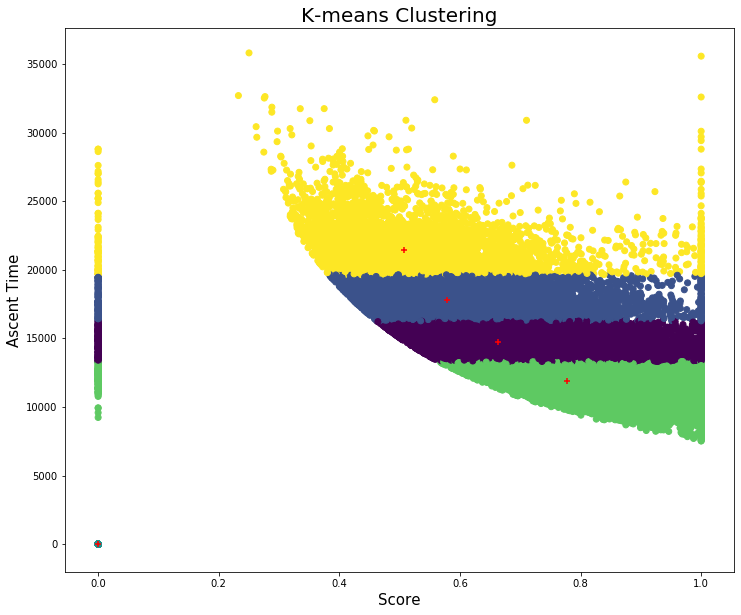

In [69]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in A], [x[1] for x in A], c=kmeans)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c='red', marker='+')
ax.set_title('K-means Clustering', size=20)
plt.xlabel("Score", size=15)
plt.ylabel("Ascent Time", size=15)
plt.show()

In [74]:
m1=dfM['score'].fillna(0)
m2=dfM['Mar'].fillna(0)
m1=np.array(m1)
m2=np.array(m2)
M=np.vstack((m1, m2)).T
    
kmeansM = KMeans(n_clusters=5).fit_predict(A)
centsM = KMeans(n_clusters=5).fit(A)
centersM = centsM.cluster_centers_

In [75]:
'''fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in M], [x[1] for x in M], c=kmeansM)
plt.scatter([x[0] for x in centersM], [x[1] for x in centersM], c='red', marker='+')
ax.set_title('K-means Clustering', size=20)
plt.xlabel("Score", size=15)
plt.ylabel("Marathon Time", size=15)
plt.show()'''

#This doesnt work for some reason...
#Gives really bizarre error about colors...????
#Its identical to what worked above for dfA, really no clue on this error

'fig, ax = plt.subplots(1,1, figsize=(12,10))\nplt.scatter([x[0] for x in M], [x[1] for x in M], c=kmeansM)\nplt.scatter([x[0] for x in centersM], [x[1] for x in centersM], c=\'red\', marker=\'+\')\nax.set_title(\'K-means Clustering\', size=20)\nplt.xlabel("Score", size=15)\nplt.ylabel("Marathon Time", size=15)\nplt.show()'